In [40]:
from pathlib import Path
import numpy as np
from skimage.io import imread
from skimage.filters import gaussian
from skimage.transform import rescale
import matplotlib.pyplot as plt

In [48]:
def get_image_dog_pyramid(image: np.ndarray, n_octaves = 4, s = 3, sigma = 1.6):
    n_scales = s + 3
    k = 2 ** (1/s)
    sigma_scales = np.zeros(n_scales)
    sigma_scales[0] = sigma
    for i in range(1, n_scales):              # Get sigma values for images within octave
        sigma_scales[i] = k * sigma_scales[i-1] 
        
    img_pyramid = []
    dog_pyramid = []
    image_s0 = gaussian(image, sigma)         # Base image in the octave
    for octave in range(n_octaves):
        img_octave = []
        dog_octave = []
        img_octave.append(image_s0)
        for i in range(1,n_scales):
            gauss_im = gaussian(img_octave[0], sigma_scales[i])
            img_octave.append(gauss_im)
            dog = img_octave[i] - img_octave[i-1]
            dog_octave.append(dog)
        image_s0 = rescale(img_octave[s], 0.5, anti_aliasing=False)
        img_pyramid.append(img_octave)
        dog_pyramid.append(dog_octave)
        
#     for i in range(n_octaves):
#         for j in range(5):
#             plt.imshow(img_pyramid[i][j])
#             plt.show()
#             plt.imshow(dog_pyramid[i][j])
#             plt.show()
        
    return img_pyramid, dog_pyramid

In [75]:
def get_scale_space_extrema(dog_pyramid, n_octaves = 4, s = 3):
    extrema = []
    keypoint_x = []
    keypoint_y = []
    t=0
    thr = 0
    for octave in range(n_octaves):
        dog_octave = dog_pyramid[octave]
        for scale in range(1, s+1):
            scale_space = np.array(dog_octave[scale - 1: scale +2])
            h,w = scale_space[0].shape
            for i in range(1,h-1):
                for j in range(1,w-1):
                    #print(scale_space[:,i-1:i+2,j-1:j+2].shape)
                    if np.abs(scale_space[1,i,j]) > thr:
                        if np.all(scale_space[1,i,j]>= scale_space[:,i-1:i+2,j-1:j+2]) or \
                            np.all(scale_space[1,i, j]<=scale_space[:,i-1:i+2,j-1:j+2]):
                            extrema.append([octave, scale, i, j])
                            keypoint_x.append([i * 2**octave])
                            keypoint_y.append([j * 2**octave])
                            t+=1
    print(t)
    return [keypoint_x, keypoint_y]
    

In [76]:
def detect_sift_keypoints(image_path: Path, n_octaves = 4, s = 3, sigma = 1.6) -> list:
    image = imread(image_path, as_gray = True)
    img_pyramid, dog_pyramid = get_image_dog_pyramid(image)
    keypoints = get_scale_space_extrema(dog_pyramid)
    plt.imshow(image, cmap = 'gray')
    plt.plot(keypoints[1],keypoints[0],'o')
    plt.show()
    return []

1022


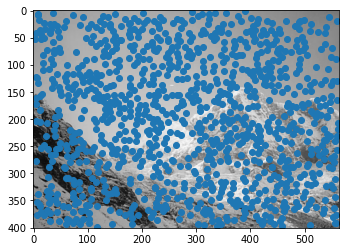

238


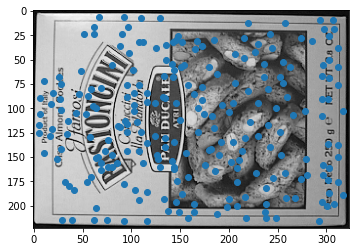

[]

In [77]:
im1_path = Path('./sift_im1.png')
detect_sift_keypoints(im1_path)
im2_path = Path('./sift_im2.png')
detect_sift_keypoints(im2_path)

def main():
    im1_path = Path('./sift_im1.png')
    detect_sift_keypoints(im1_path)
    return


if __name__ == '__main__':
    main()